In [96]:
import pandas as pd
import numpy as np
import json
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
import altair as alt
import folium
import folium.plugins as plugins
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# geospatial visualizaiton libraries
import geopandas as gpd
import gdal

# jupyter interactivity
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## Getting the World Map

In [2]:
# world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


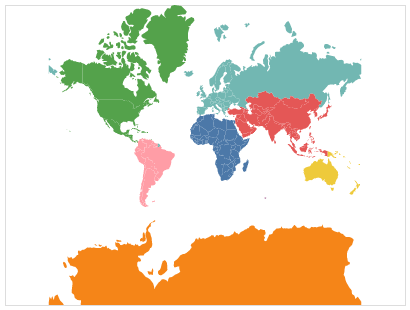

In [3]:
# plotting world map
alt.Chart(world_map).mark_geoshape().encode(
    alt.Color('continent:N', legend=None)
)

## Plotting South America

In [4]:
sm = world_map[world_map['continent'] == 'South America']

sm.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


In [5]:
sm.crs

{'init': 'epsg:4326'}

## Plotting South America

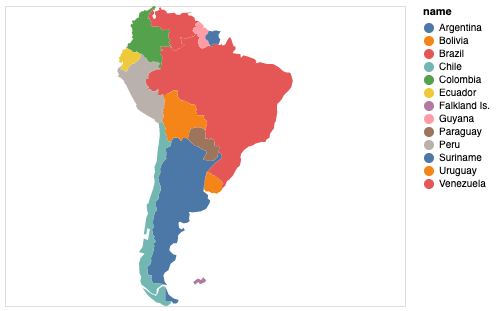

In [6]:
alt.Chart(sm).mark_geoshape().encode(
    alt.Color('name:N'),
    alt.Tooltip('name')
)

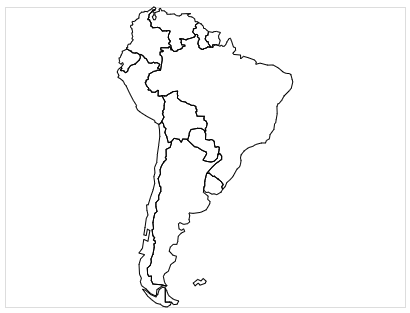

In [7]:
# plotting boundaries
sm_map = alt.Chart(sm).mark_geoshape(
    fill = None,
    stroke = 'black'
)
# display map
sm_map

In [71]:
# getting all the BRs
beni = gpd.read_file('data/BRs/benibr.gpkg')
bioaybr = gpd.read_file('data/BRs/bioaybr.gpkg')
centamz = gpd.read_file('data/BRs/centamzbr.gpkg')
manu = gpd.read_file('data/BRs/manubr.gpkg')
pilon = gpd.read_file('data/BRs/pilonlajas.gpkg')
sumaco = gpd.read_file('data/BRs/sumacobr.gpkg')
yasuni = gpd.read_file('data/BRs/yasunibr.gpkg')
podocarpus = gpd.read_file('data/BRs/podocarpusbr.gpkg')

In [72]:
br_name = ['Beni BR', 'Bioay Br', 'Central Amazon BR', 'Manu BR', 'Pilon BR', 'Sumaco BR', 'Yasuni BR', 'Podocarpus BR']
br_df = [beni, bioaybr, centamz, manu, pilon, sumaco, yasuni, podocarpus]

for i in range(len(br_df)):
    print(br_name[i])
    display(br_df[i])

Beni BR


,BiosRes,boundary,area_m2,geometry
0,None,total,2.150106e+09,"MULTIPOLYGON (((777339.181 8371994.202, 775692..."


Bioay Br


,BiosRes,area_m2,boundary,geometry
0,BIOAY BR,2.105549e+10,total,"MULTIPOLYGON (((536092.079 8983540.493, 539424..."


Central Amazon BR


,area_m2,boundary,BiosRes,geometry
0,2.011188e+11,total,Central Amazon BR,"MULTIPOLYGON (((3427590.890 9707371.533, 34360..."


Manu BR


,BiosRes,boundary,area_m2,geometry
0,Manu BR,total,2.423716e+10,"MULTIPOLYGON (((195790.253 8747464.043, 195825..."


Pilon BR


,BiosRes,boundary,area_m2,geometry
0,Pilón Lajas BR,total,5868926750,"MULTIPOLYGON (((658113.536 8395098.748, 660176..."


Sumaco BR


,BiosRes,boundary,area_m2,geometry
0,None,total,5.861442e+09,"MULTIPOLYGON (((247856.155 9950248.167, 248041..."


Yasuni BR


,BiosRes,boundary,area_m2,geometry
0,None,total,1.620388e+10,"MULTIPOLYGON (((423918.957 9821625.100, 423432..."


Podocarpus BR


,BiosRes,boundary,area_m2,geometry
0,Podoc. El Cóndor BR,total,1.275713e+10,"MULTIPOLYGON (((777328.305 9563088.953, 777531..."


In [73]:
print('CRS Projection of each BR\n')
for i in range(len(br_df)):
    print(f"{br_name[i]} projection: {br_df[i].crs}")

CRS Projection of each BR

Beni BR projection: {'init': 'epsg:31979'}
Bioay Br projection: {'init': 'epsg:31978'}
Central Amazon BR projection: {'init': 'epsg:5880'}
Manu BR projection: {'init': 'epsg:31979'}
Pilon BR projection: {'init': 'epsg:31979'}
Sumaco BR projection: {'init': 'epsg:31978'}
Yasuni BR projection: {'init': 'epsg:31978'}
Podocarpus BR projection: {'init': 'epsg:31977'}


In [74]:
# resetting crs(projection) for altair

beni.crs = {'init' :'epsg:31979'}
beni = beni.to_crs({'init': 'epsg:4326'})

bioaybr.crs = {'init' :'epsg:31978'}
bioaybr = bioaybr.to_crs({'init': 'epsg:4326'})

centamz.crs = {'init' :'epsg:5880'}
centamz = centamz.to_crs({'init': 'epsg:4326'})

manu.crs = {'init' :'epsg:31979'}
manu = manu.to_crs({'init': 'epsg:4326'})

pilon.crs = {'init' :'epsg:31979'}
pilon = pilon.to_crs({'init': 'epsg:4326'})

sumaco.crs = {'init' :'epsg:31978'}
sumaco = sumaco.to_crs({'init': 'epsg:4326'})

yasuni.crs = {'init' :'epsg:31978'}
yasuni = yasuni.to_crs({'init': 'epsg:4326'})

podocarpus.crs = {'init' :'epsg:31977'}
podocarpus = podocarpus.to_crs({'init': 'epsg:4326'})

In [116]:
# # updating the list with updated crs
# br_df = [beni, bioaybr, centamz, manu, pilon, sumaco, yasuni, podocarpus]

# # plotting all BRs
# colors = ['red', 'brown', 'blue', 'green', 'violet', 'purple', 'pink', 'grey']

# # map of south america
# br_base = alt.Chart(sm).mark_geoshape(
#     fill = None,
#     stroke = 'black'
# ).properties(
#     width = 700,
#     height = 700
# )

# for i in range(len(br_df)):
#     br_base = br_base + alt.Chart(br_df[i]).mark_geoshape(color=colors[i])

# # display the map
# br_base.encode(alt.Tooltip('BiosRes:N'))

# Using Folium to visualize

In [34]:
# Map of the world
folium.Map(tiles='CartoDB positron')

In [89]:
# visualizing south america
south_america = folium.Map(location=[-10.0902, -60.7129], zoom_start=4.5, tiles="CartoDB positron")

# mini map
minimap = plugins.MiniMap(toggle_display=True)

# add mini map to map
south_america = south_america.add_child(minimap)

# # add scroll zoom toggler to map
# plugins.ScrollZoomToggler().add_to(south_america)

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(south_america)

# display map
south_america

# # add latitude and longitude tool to map
# south_america = south_america.add_child(folium.LatLngPopup())

# # add measure control
# measure_control = plugins.MeasureControl(
#     position = 'topleft',
#     active_color = 'red',
#     completed_color = 'red',
#     primary_length_units = 'meters'
# )
# south_america = south_america.add_child(measure_control)

# # add drawing tools
# draw = plugins.Draw(export=True)
# draw.add_to(south_america)

# saving a map
# south_america.save('/Users/shusingh/Desktop/RA/Coding/south_america.html')

In [90]:
# adding all the BRs
br_name = ['Beni BR', 'Bioay Br', 'Central Amazon BR', 'Manu BR', 'Pilon BR', 'Sumaco BR', 'Yasuni BR', 'Podocarpus BR']


for i in range(len(br_df)):
    temp = folium.GeoJson(br_df[i]['geometry'].to_json(), style_function=lambda x: {'fillColor': 'orange'})
#     folium.Popup(br_name[i]).add_to(temp)
    temp.add_to(south_america)

display(south_america)

## Adding Charts and Markers to Folium Map

In [109]:
# podocarpus
forest_loss_podocarpus_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        37724949,
        11781,
        4556,
        6314,
        6331,
        6419,
        10791,
        6122,
        6820,
        7642,
        9879,
        7093,
        10666,
        8027,
        6456,
        5048,
        8746,
        5999,
        6586,
        5237,
        9214
    ],
    'Area(m^2)': [
        28900209015.17624,
        9025151.032219851,
        3490245.998030188,
        4837009.049947894,
        4850032.355910693,
        4917447.116188712,
        8266734.979092132,
        4689922.300250397,
        5224643.921546506,
        5854359.068688914,
        7568072.918029021,
        5433782.893772634,
        8170975.376424491,
        6149298.64490525,
        4945791.958578334,
        3867155.794130024,
        6700107.879449522,
        4595694.851225438,
        5045381.945352681,
        4011944.313363497,
        7058631.831837171
    ]
}

# converting to pandas dataframe
forest_loss_podocarpus_10km = pd.DataFrame(data=forest_loss_podocarpus_10km)
forest_loss_podocarpus_10km_clean = forest_loss_podocarpus_10km.loc[1:]

podocarpus_chart = alt.Chart(forest_loss_podocarpus_10km_clean, title='Podocarpus Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6)
).properties(
    width = 450,
    height = 400
)
podocarpus_chart = json.loads(podocarpus_chart.to_json())

# Sumaco BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_sumaco_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        16190101,
        8945,
        14340,
        5448,
        8632,
        6254,
        9204,
        8332,
        19972,
        14367,
        11222,
        20368,
        20947,
        18900,
        12512,
        20330,
        24820,
        71521,
        27674,
        23179,
        38152
    ],
    'Area(m^2)': [
        12460026367.54916,
        6884140.862229779,
        11036174.39512298,
        4192822.740908646,
        6643253.652629117,
        4813126.54582281,
        7083469.25611659,
        6412371.343107716,
        15370604.95253808,
        11056953.8029799,
        8636537.591497215,
        15675369.60110633,
        16120972.45848264,
        14545585.49984828,
        9629331.52243924,
        15646124.50856696,
        19101663.07440393,
        55043112.19760045,
        21298123.44565086,
        17838736.84132186,
        29362072.909535
    ]
}

# converting to pandas dataframe
forest_loss_sumaco_10km = pd.DataFrame(data=forest_loss_sumaco_10km)
forest_loss_sumaco_10km_clean = forest_loss_sumaco_10km.loc[1:]

sumaco_chart = alt.Chart(forest_loss_sumaco_10km_clean, title='Sumaco Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
sumaco_chart = json.loads(sumaco_chart.to_json())

# Yasuni BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_yasuni_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        55010774,
        1227,
        2565,
        1139,
        2205,
        6317,
        1912,
        5274,
        3397,
        4158,
        5000,
        4144,
        7594,
        5972,
        5740,
        7869,
        7267,
        15596,
        11788,
        5464,
        17720

    ],
    'Area(m^2)': [
        42266860139.75255,
        942750.5490374735,
        1970786.600066112,
        875136.8177291624,
        1694184.971986658,
        4853590.234938648,
        1469061.980244213,
        4052213.851364006,
        2610043.696071962,
        3194748.804317697,
        3841689.27888131,
        3183992.07433683,
        5834757.676764933,
        4588513.674695836,
        4410259.292155744,
        6046050.587103406,
        5583511.197926096,
        11982997.19868658,
        9057166.643890576,
        4198198.043961496,
        13614946.80435536
    ]
}

# converting to pandas dataframe
forest_loss_yasuni_10km = pd.DataFrame(data=forest_loss_yasuni_10km)
forest_loss_yasuni_10km_clean = forest_loss_yasuni_10km.loc[1:]

yasuni_chart = alt.Chart(forest_loss_yasuni_10km_clean, title='Yasuni Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
yasuni_chart = json.loads(yasuni_chart.to_json())

# Pilon lajas BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_pilon_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        22482646,
        26127,
        27885,
        24616,
        22951,
        23321,
        30938,
        30625,
        22889,
        39844,
        47987,
        30336,
        25953,
        28826,
        58158,
        20372,
        42303,
        43457,
        41263,
        50705,
        59750
    ],
    'Area(m^2)': [
        16663621709.08572,
        19364733.3322458,
        20667722.62294462,
        18244814.77806723,
        17010754.9549651,
        17284990.47121002,
        22930536.22050065,
        22698547.79729887,
        16964801.97656731,
        29531459.21422289,
        35566864.10282386,
        22484347.62379946,
        19235768.52190359,
        21365170.24669183,
        43105376.09127535,
        15099259.28903094,
        31354013.63164519,
        32209331.97150096,
        30583189.47787569,
        37581383.38161761,
        44285329.98819942
    ]
}

# converting to pandas dataframe
forest_loss_pilon_10km = pd.DataFrame(data=forest_loss_pilon_10km)
forest_loss_pilon_10km_clean = forest_loss_pilon_10km.loc[1:]

pilon_chart = alt.Chart(forest_loss_pilon_10km_clean, title='Pilon Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
pilon_chart = json.loads(pilon_chart.to_json())

# Manu BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_manu_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        78334383,
        3493,
        2262,
        1848,
        2481,
        7420,
        2140,
        4458,
        2894,
        2054,
        3037,
        1895,
        4378,
        2011,
        2973,
        2250,
        2669,
        8928,
        3671,
        5393,
        4086
    ],
    'Area(m^2)': [
        58611744438.24326,
        2613549.957019304,
        1692484.970735089,
        1382719.816940073,
        1856346.247742598,
        5551829.568016959,
        1601201.519616751,
        3335587.090865176,
        2165363.176528447,
        1536854.168828414,
        2272359.352839286,
        1417886.392370908,
        3275729.090131839,
        1504680.493434246,
        2224472.952252617,
        1683506.270625089,
        1997012.549465938,
        6680152.881840352,
        2746734.008650978,
        4035177.474436046,
        3057247.387455161
    ]
}

# converting to pandas dataframe
forest_loss_manu_10km = pd.DataFrame(data=forest_loss_manu_10km)
forest_loss_manu_10km_clean = forest_loss_manu_10km.loc[1:]

manu_chart = alt.Chart(forest_loss_manu_10km_clean, title='Manu Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
manu_chart = json.loads(manu_chart.to_json())

# Central Amazon BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_centamzbr_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        796650658,
        28568,
        39907,
        32035,
        19771,
        27618,
        39593,
        19550,
        31059,
        65521,
        49702,
        40916,
        50273,
        47161,
        55877,
        52439,
        194840,
        92136,
        52432,
        41147,
        64558
    ],
    'Area(m^2)': [
        611702272597.7335,
        21935725.96480809,
        30642292.63783242,
        24597836.08522218,
        15181015.05356416,
        21206275.54242754,
        30401190.0771719,
        15011321.85004194,
        23848421.75654489,
        50309811.71031192,
        38163310.41385087,
        31417045.77065555,
        38601748.50982908,
        36212222.49462036,
        42904738.15932448,
        40264895.47285675,
        149606442.4175024,
        70745941.17521557,
        40259520.57500762,
        31594417.39967651,
        49570379.334783
    ]
}

# converting to pandas dataframe
forest_loss_centamzbr_10km = pd.DataFrame(data=forest_loss_centamzbr_10km)
forest_loss_centamzbr_10km_clean = forest_loss_centamzbr_10km.loc[1:]

centamz_chart = alt.Chart(forest_loss_centamzbr_10km_clean, title='Central Amazon Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
centamz_chart = json.loads(centamz_chart.to_json())

# Beni BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_beni_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        12541597,
        5267,
        6589,
        4048,
        11205,
        3065,
        9599,
        4075,
        6236,
        6177,
        32450,
        10657,
        6189,
        2886,
        18691,
        8414,
        1291,
        3040,
        2117,
        28619,
        5618
    ],
    'Area(m^2)': [
        9344740016.354282,
        3924440.058641495,
        4909461.846665808,
        3016163.538519228,
        8348842.00817884,
        2283730.544852133,
        7152211.908657625,
        3036281.230105201,
        4646441.656671419,
        4602480.775057626,
        24178484.8875862,
        7940527.378952424,
        4611421.971318059,
        2150357.700634015,
        13926658.27531198,
        6269268.777939917,
        961923.6976848624,
        2265103.052642898,
        1577376.040277966,
        21324007.98144313,
        4185970.049259146
    ]
}

# converting to pandas dataframe
forest_loss_beni_10km = pd.DataFrame(data=forest_loss_beni_10km)
forest_loss_beni_10km_clean = forest_loss_beni_10km.loc[1:]

beni_chart = alt.Chart(forest_loss_beni_10km_clean, title='Beni Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
beni_chart = json.loads(beni_chart.to_json())

# Bioay BR
# creating csv files for forest loss
# creating new data from GDAL report

forest_loss_bioay_10km = {
    'Year': [
        0,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
    ],
    'Pixel Count':[
        62556078,
        22050,
        25738,
        20320,
        29300,
        60668,
        28031,
        21266,
        46502,
        61422,
        32185,
        31754,
        104480,
        68452,
        82818,
        62343,
        70110,
        108875,
        59018,
        83442,
        89372
    ],
    'Area(m^2)': [
        47219902235.85478,
        16644247.49103673,
        19428101.67457158,
        15338372.2910597,
        22116845.87244336,
        45794703.25561071,
        21158952.44540819,
        16052452.02468876,
        35101623.43892018,
        46363853.487277,
        24294562.60766517,
        23969226.069405,
        78865803.98474002,
        51670386.8143513,
        62514434.86225305,
        47059062.19200466,
        52921913.4510923,
        82183330.86560652,
        44549215.34811817,
        62985455.74363205,
        67461663.79904465
    ]
}

# converting to pandas dataframe
forest_loss_bioay_10km = pd.DataFrame(data=forest_loss_bioay_10km)
forest_loss_bioay_10km_clean = forest_loss_bioay_10km.loc[1:]

bioay_chart = alt.Chart(forest_loss_bioay_10km_clean, title='Bioa Forest Loss 10km Buffer').mark_bar().encode(
    alt.X('Year:N'),
    alt.Y('Area(m^2):Q'),
    alt.Tooltip(['Year', 'Area(m^2)']),
    color = alt.value('red'),
    opacity = alt.value(0.6),
).properties(
    width = 450,
    height = 400
)
bioay_chart = json.loads(bioay_chart.to_json())

In [115]:
# adding tooltip markers and charts to map
folium.map.Marker(location=[-2.32, -63.72],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Central Amazon BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(centamz_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-1.20, -76.19],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Yasuni BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(yasuni_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-4.08, -78.98],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Podocarpus BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(podocarpus_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-0.45, -77.53],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Sumaco BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(sumaco_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-10.10, -74.96],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Bioay BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(bioay_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-12.23, -71.60],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Manu BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(manu_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-14.460, -66.100],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Beni BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(beni_chart, height=350, width=600))
                 ).add_to(south_america)

folium.map.Marker(location=[-15.08, -67.35],
                  icon=folium.Icon(color='green', icon='fa-tree', prefix='fa'),
                  tooltip="Pilon BR",
                  popup=folium.Popup(max_width=600).add_child(folium.VegaLite(pilon_chart, height=350, width=600))
                 ).add_to(south_america)


south_america